In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [5]:
df = pd.read_csv("11-iris.csv")

In [7]:
df

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...,...
145,146,6.7,3.0,5.2,2.3,Iris-virginica
146,147,6.3,2.5,5.0,1.9,Iris-virginica
147,148,6.5,3.0,5.2,2.0,Iris-virginica
148,149,6.2,3.4,5.4,2.3,Iris-virginica


In [9]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [11]:
df["Species"].value_counts()

Species
Iris-setosa        50
Iris-versicolor    50
Iris-virginica     50
Name: count, dtype: int64

In [13]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


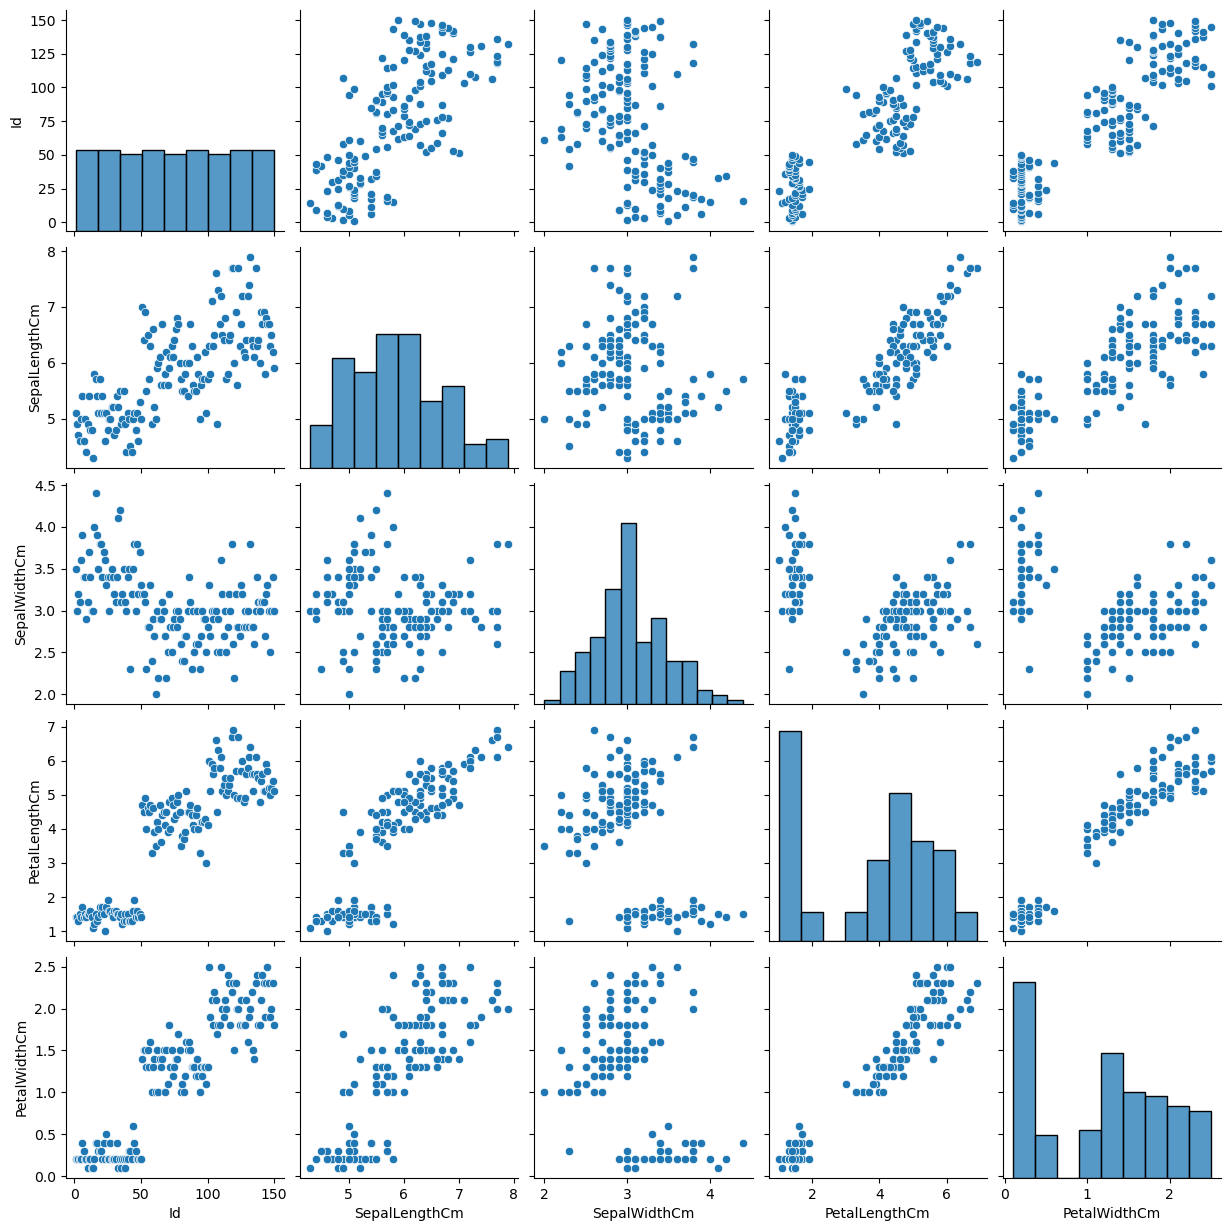

In [17]:
sns.pairplot(df)
plt.show()

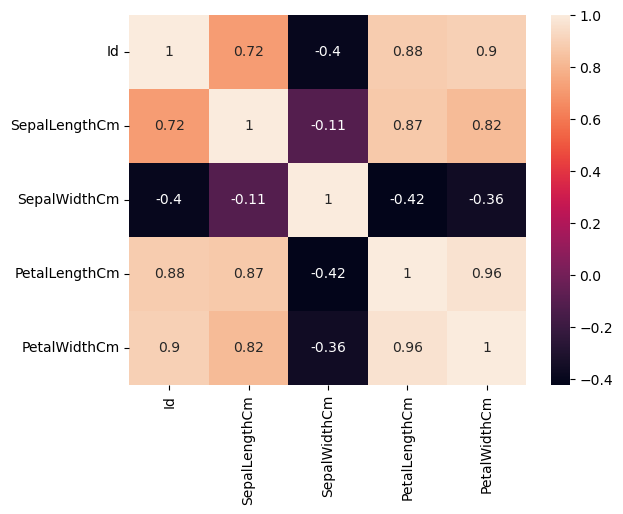

In [25]:
df_heatmap = df.drop("Species",axis=1)
sns.heatmap(df_heatmap.corr(),annot=True)
plt.show()

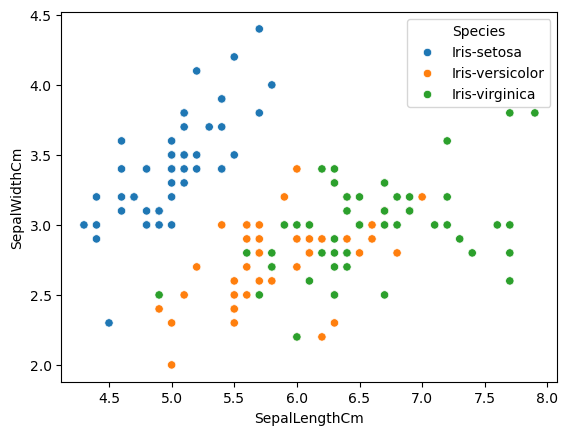

In [27]:
sns.scatterplot(x=df["SepalLengthCm"],y=df["SepalWidthCm"],hue=df["Species"])
plt.show()

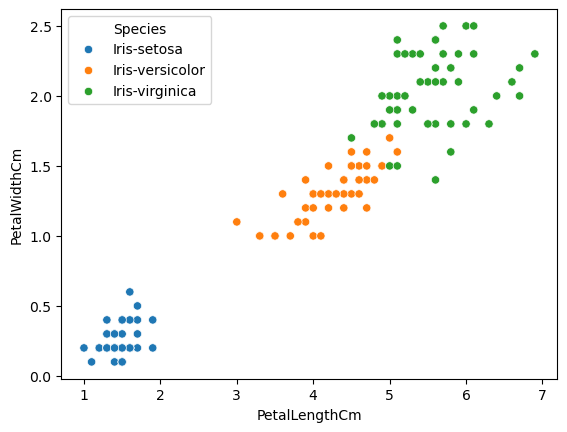

In [29]:
sns.scatterplot(x=df["PetalLengthCm"],y=df["PetalWidthCm"],hue=df["Species"])
plt.show()

In [34]:
df = df.drop("Id",axis=1)

In [36]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


In [38]:
from sklearn.preprocessing import LabelEncoder

In [40]:
label = LabelEncoder()

In [42]:
df["Species"] = label.fit_transform(df["Species"])

In [44]:
df

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,2
146,6.3,2.5,5.0,1.9,2
147,6.5,3.0,5.2,2.0,2
148,6.2,3.4,5.4,2.3,2


In [46]:
from sklearn.model_selection import train_test_split

In [48]:
X = df.drop("Species",axis=1)
y= df["Species"]

In [50]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.25,random_state=15)

In [54]:
from sklearn.preprocessing import StandardScaler
from sklearn.naive_bayes import GaussianNB

In [58]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [60]:
gnb = GaussianNB()

In [62]:
gnb.fit(X_train_scaled,y_train)
y_pred = gnb.predict(X_test_scaled)

In [64]:
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report

In [72]:
print(confusion_matrix(y_test, y_pred))
print("Score: ",accuracy_score(y_test, y_pred))
print(classification_report(y_test, y_pred))

[[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]
Score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38



In [76]:
#Logistic Regression
from sklearn.linear_model import LogisticRegression

In [78]:
model = LogisticRegression()
model.fit(X_train_scaled,y_train)
y_pred2 = model.predict(X_test_scaled)

In [84]:
score = accuracy_score(y_test, y_pred2)
print("score: ",score)
print(classification_report(y_test, y_pred2))
print("confusion matrix: \n",confusion_matrix(y_test, y_pred2))

score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [86]:
from sklearn.svm import SVC

In [88]:
svc = SVC()
svc.fit(X_train_scaled,y_train)
y_pred3 = svc.predict(X_test_scaled)

In [90]:
score = accuracy_score(y_test, y_pred3)
print("score: ",score)
print(classification_report(y_test, y_pred3))
print("confusion matrix: \n",confusion_matrix(y_test, y_pred3))

score:  1.0
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        12
           1       1.00      1.00      1.00        14
           2       1.00      1.00      1.00        12

    accuracy                           1.00        38
   macro avg       1.00      1.00      1.00        38
weighted avg       1.00      1.00      1.00        38

confusion matrix: 
 [[12  0  0]
 [ 0 14  0]
 [ 0  0 12]]


In [92]:
## Hyperparameter Tuning using GridSearch CV
from sklearn.model_selection import GridSearchCV
 
# defining parameter range
param_grid = {'C': [1,10,100,1000],
              'gamma': [1, 0.1],
              'kernel': ['rbf',"linear"]}

In [94]:
grid = GridSearchCV(estimator=SVC(),param_grid=param_grid,refit = True,verbose = 3,n_jobs=-1)

In [98]:
grid.fit(X_train_scaled,y_train)

Fitting 5 folds for each of 16 candidates, totalling 80 fits


GridSearchCV(estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1, 10, 100, 1000], 'gamma': [1, 0.1],
                         'kernel': ['rbf', 'linear']},
             verbose=3)

In [100]:
grid.best_params_

{'C': 1, 'gamma': 1, 'kernel': 'linear'}

In [102]:
grid.best_score_

np.float64(0.9640316205533598)